1. combine all datasets together
2. decide classes
    a. defamation
    b. misleading
    c. offense/cyberbullying
    e. normal posts

we have 2 sets - train.csv, test.csv ,

we need to combine them and then - 0: No-cyberbullying; 1: Harassment; 2: Defamation. we need to take defamation and harassment from there definitely (Comments | label)

then we have asa_misrep_posts_joined (post_text | label = 3)
then we have offensive asa_offensive_posts_joined (post_text | label = 4), we need to combine it with harassment

In [80]:
import requests
import pandas as pd

# Replace with your actual Bearer Token from Twitter Developer Portal
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAM642QEAAAAAaPPsQUEWzYFM7epNfqRz3G1rgmc%3DjsXbbQi8hJd9ybk7BJ5XKvipWxtX9qu5ylNyOm3fTOMtoLqwYU'
USERNAME = 'Adidas'  # Any public corporate handle
TWEET_COUNT = 50

def get_user_id(username):
    url = f'https://api.twitter.com/2/users/by/username/{username}'
    headers = {'Authorization': f'Bearer {BEARER_TOKEN}'}
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    return response.json()['data']['id']

def get_user_tweets(user_id, max_results=50):
    url = f'https://api.twitter.com/2/users/{user_id}/tweets'
    headers = {'Authorization': f'Bearer {BEARER_TOKEN}'}
    params = {
        'max_results': max_results,
        'tweet.fields': 'created_at,text',
        'exclude': 'retweets,replies'
    }
    response = requests.get(url, headers=headers, params=params)
    response.raise_for_status()
    return response.json()['data']

# Main flow
user_id = get_user_id(USERNAME)
tweets = get_user_tweets(user_id, TWEET_COUNT)

tweets_df = pd.DataFrame(tweets)
print(tweets_df.head())

                 created_at                   id  \
0  2025-06-06T17:14:40.000Z  1931037032144400526   
1  2025-06-03T17:10:58.000Z  1929948939920314630   
2  2025-05-29T22:43:54.000Z  1928220784398365000   
3  2025-05-29T15:13:29.000Z  1928107433370566752   
4  2025-04-30T16:54:21.000Z  1917623569887928476   

                                                text edit_history_tweet_ids  
0  The adidas Community Animation Pack is out now...  [1931037032144400526]  
1          already iconic 💎🔥 https://t.co/VMeemEH8Op  [1929948939920314630]  
2  What secret talent does @AlexZverev reveal in ...  [1928220784398365000]  
3  🎬 NEW EPISODE: Ride Home with @AlexZverev is h...  [1928107433370566752]  
4  Can the @roblox community beat this? https://t...  [1917623569887928476]  


In [81]:
tweets_df['label'] = 0  # Assign label 0 to all
tweets_df.to_csv('normal_corporate_posts4.csv', index=False)

print("Saved", len(tweets_df), "tweets to normal_corporate_posts.csv")

Saved 49 tweets to normal_corporate_posts.csv


In [83]:
# import instaloader
# import pandas as pd

# # Setup
# L = instaloader.Instaloader()
# L.login("metadesigncreator", "nalra2001")
# # Load profile

# profile = instaloader.Profile.from_username(L.context, "apple")
# followers = profile.get_followers()

# for follower in followers:
#     print(follower)
# posts = []
# for post in profile.get_posts():
#     if post.caption:
#         posts.append({"text": post.caption.strip(), "label": 0})
#     if len(posts) >= 50:
#         break

# import pandas as pd
# df = pd.DataFrame(posts)
# df.to_csv("apple_ig_posts.csv", index=False)
# print("✅ Saved 50 posts from @apple")
print("")

In [60]:
import pandas as pd

# Load datasets
train = pd.read_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/data/train.csv')
test = pd.read_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/data/test.csv')
misrep = pd.read_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/misleading/asa_misrep_posts_joined.csv')
offensive = pd.read_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/defam/asa_offensive_posts_joined.csv')

# Rename text columns for consistency
train = train.rename(columns={'Comments': 'text'})
test = test.rename(columns={'Comments': 'text'})
misrep = misrep.rename(columns={'post_text': 'text'})
offensive = offensive.rename(columns={'post_text': 'text'})

# Combine train and test, keeping only labels 0 (No-cyberbullying), 1 (Harassment), 2 (Defamation)
data = pd.concat([train, test], ignore_index=True)
data = data[data['label'].isin([0, 1, 2])]

# Reassign labels for additional datasets
misrep['label'] = 3     # Misleading posts
offensive['label'] = 1  # Offensive posts -> merge into Harassment

# Select only text and label columns and concatenate all datasets
final_df = pd.concat([
    data[['text', 'label']],
    misrep[['text', 'label']],
    offensive[['text', 'label']]
], ignore_index=True)

# Shuffle the final dataset
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
final_df.to_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/data/final_dataset.csv', index=False)

# Display class distribution and a preview
print("Class distribution:")
print(final_df['label'].value_counts())

# Show the first few rows
from IPython.display import display
display(final_df.head())

Class distribution:
label
0    1453
1    1261
3     433
2     249
Name: count, dtype: int64


,text,label
0,"""\n\nI just wonder how can say one day """"I c...",0
1,FERN BRADY I GAVE YOU MILK TO DRINK,3
2,You don't know shit about old Norse. And you ...,1
3,Bakan \n\nWhy is Abbie Bakan even mentioned in...,0
4,"""\n\n Source suggested \n\nI'd suggest that so...",0


In [84]:
final_df = pd.read_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/data/final_dataset.csv')

# Load normal corporate posts
normal1 = pd.read_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/normal_corporate_posts.csv')
normal2 = pd.read_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/normal_corporate_posts2.csv')
normal3 = pd.read_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/normal_corporate_posts3.csv')
normal4 = pd.read_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/normal_corporate_posts4.csv')

# Concatenate all normal posts
normal_posts = pd.concat([normal1, normal2, normal3, normal4], ignore_index=True)

# Ensure columns are consistent
normal_posts = normal_posts[['text', 'label']]

# Append to final dataset
combined_df = pd.concat([final_df, normal_posts], ignore_index=True)

# Shuffle and reset index
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save new dataset
combined_df.to_csv('/Users/arlankalin/Downloads/Cyberbullying-emotion-main/data/final_dataset_with_normal.csv', index=False)

# Show class distribution
print("New class distribution:")
print(combined_df['label'].value_counts())

# Show a few samples
from IPython.display import display
display(combined_df.head())

New class distribution:
label
0    1747
1    1261
3     433
2     249
Name: count, dtype: int64


,text,label
0,couldn’t decide between ranch or spicy so i go...,0
1,she really loves steak doesnt she @Anime_Frier...,0
2,"Stan, Do you have a picture of Eminem on your ...",1
3,I have changed Lou's block duration to indefin...,0
4,Bla bla bla....suck it Irishguy =),1


In [17]:
import os, collections, re, json, itertools
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download("punkt", quiet=True)

True


Average tokens per post:
label
0    177.3
1     77.3
2    339.0
3     89.0
Name: token_len, dtype: float64


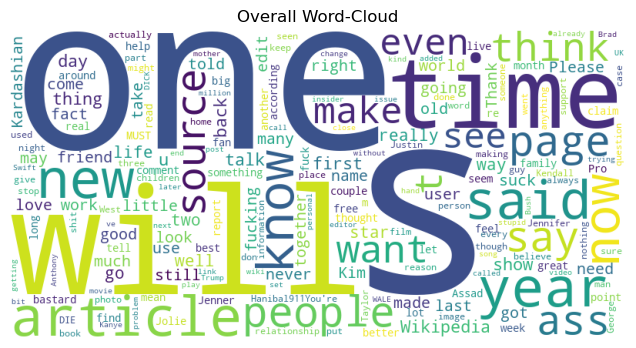

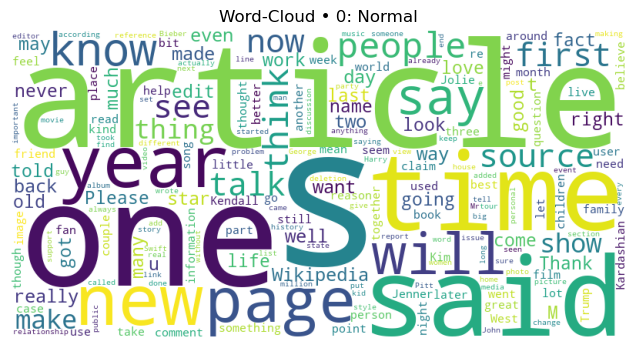

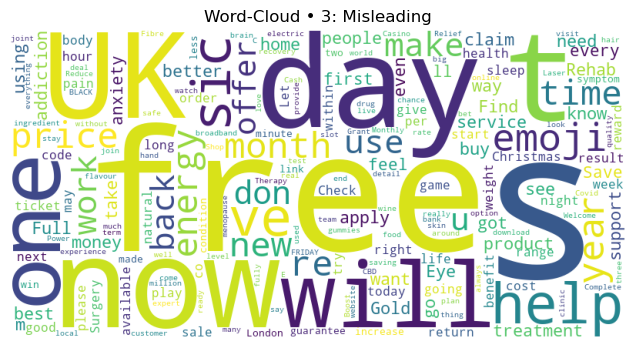

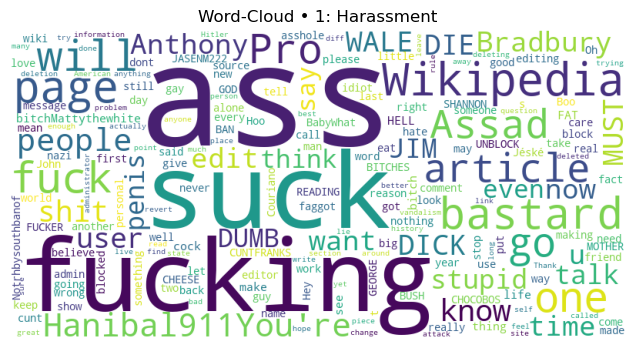

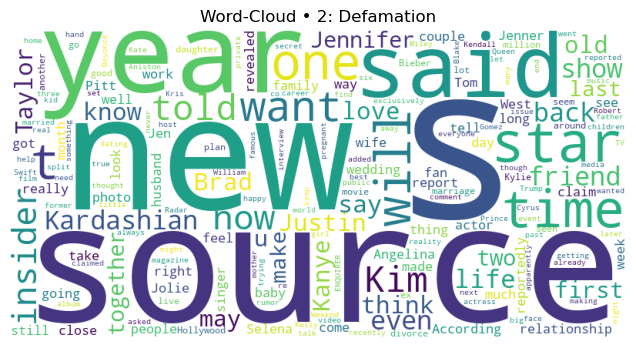

In [18]:
LABEL_NAME = {0:"Normal", 1:"Harassment", 2:"Defamation", 3:"Misleading"}
df = final_df
# --- basic stats
df["char_len"]  = df["text"].str.len()
df["token_len"] = df["text"].str.split().str.len()

print("\nAverage tokens per post:")
print(df.groupby("label")["token_len"].mean().round(1))

# --- word-cloud helper
def plot_wc(text, title):
    wc = WordCloud(width=800, height=400,
                   background_color="white",
                   stopwords=STOPWORDS, collocations=False
                   ).generate(text)
    plt.figure(figsize=(8,4)); plt.imshow(wc); plt.axis("off"); plt.title(title); plt.show()

# overall cloud
plot_wc(" ".join(df["text"].astype(str)), "Overall Word-Cloud")

# per-class clouds
for lbl in df["label"].unique():
    plot_wc(" ".join(df[df["label"]==lbl]["text"].astype(str)),
            f"Word-Cloud • {lbl}: {LABEL_NAME[lbl]}")

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arlankalin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
LIWC = {
    "pronouns": {"i","you","he","she","we","they"},
    "positive_emotion": {"nice","great","love","good","happy","awesome"},
    "negative_emotion": {"hate","bad","sad","angry","terrible"},
    "swear": {"shit","fuck","damn","hell"},
    "cognitive": {"think","know","believe","because"},
}

from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df = final_df
# -------------------------------------------------------------
# 2) Count categories per post
# -------------------------------------------------------------
def liwc_count(text, liwc_dict=LIWC):
    tokens = tokenizer.tokenize(str(text).lower())
    tally = collections.Counter(token_total=len(tokens))
    for tok in tokens:
        for category, words in liwc_dict.items():
            if tok in words:
                tally[category] += 1
    return tally

records=[]
for _,row in df.iterrows():
    rec = liwc_count(row["text"])
    rec["label"] = row["label"]
    records.append(rec)
liwc_df = pd.DataFrame(records).fillna(0)

# -------------------------------------------------------------
# 3) Aggregate & normalise (% of tokens)
# -------------------------------------------------------------
cats = [c for c in liwc_df.columns if c not in {"label"}]
group = liwc_df.groupby("label")
summ = group[cats + ["token_total"]].sum()
summ = summ.loc[:, ~summ.columns.duplicated()]
for c in cats:
    summ[c] = (summ[c] / summ["token_total"] * 100).round(2)
summ = summ.drop(columns="token_total").reset_index()
summ["label_name"] = summ["label"].map(LABEL_NAME)

print("\nLIWC-style category percentages:")
display(summ)



LIWC-style category percentages:


,label,pronouns,cognitive,negative_emotion,swear,positive_emotion,label_name
0,0,11345.0,1359.0,115.0,30.0,694.0,Normal
1,1,6653.0,558.0,125.0,559.0,222.0,Harassment
2,2,2631.0,332.0,52.0,6.0,233.0,Defamation
3,3,1159.0,94.0,10.0,6.0,81.0,Misleading
